<a href="https://colab.research.google.com/github/alyssa-raphaella/COMP8240/blob/master/comp8240_practical_week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Practical Week 8: Working with Tweets of Donald Trump

In [1]:
import tweepy

**Task1**: Authentication

In [3]:
# Your credentials go here ...

consumer_key = 'CfqZfNRTvcHdDRCo23PZt3ETa'
consumer_key_secret = '9NVfiSz9tcp2GvLDchPxfh2sNLHKpmUVwfvuxeCPwdjKM14upU'
access_token = '1223923047490445312-gNkYAcwaS1HDVmQfi7KF0YJQBpokZW'
access_token_secret = 'ZZ5iad8aXQCrvI9NnAzqZxYBTdKHb81WubYeLeAiQ3T8i'

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)

auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [4]:
api.update_status("Tweepy Test")

Status(_api=<tweepy.api.API object at 0x7fa168f86d30>, _json={'created_at': 'Wed Sep 30 03:18:40 +0000 2020', 'id': 1311143399186214912, 'id_str': '1311143399186214912', 'text': 'Tweepy Test', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://github.com/alyssa-raphaella/Twitter" rel="nofollow">COMP8230_TwitterTest001</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1223923047490445312, 'id_str': '1223923047490445312', 'name': 'Alyssa', 'screen_name': '14rg3', 'location': 'Republic of the Philippines', 'description': 'voice inside my head', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 3, 'friends_count': 16, 'listed_count': 0, 'created_at': 'Sun Feb 02 10:56:17 +0000 2020', 'favourites_count': 6, 'utc_offset': None, 'time_zone': Non

In [40]:
max_tweets = 150
screen_name = 'realDonaldTrump'

tweets = api.user_timeline(screen_name = screen_name,
                           tweet_mode = 'extended',
                           count = max_tweets)

In [41]:
import json

list_of_dicts = []
for json_tweet in tweets:
    list_of_dicts.append(json_tweet._json)

with open('trump-150-tweets.txt', mode = 'w') as file:
        file.write(json.dumps(list_of_dicts, indent = 4))

**Task 1**: Read the file 'trump-150-tweets.txt' that consists of a list of tweets in the form of JSON objects (dictionaries) 
    into a new list of simpler dictionaries. Each of these simpler dictionaries should contain only the following keys:  'text', 'favorite_count', 'retweet_count' and 'created_at' as shown below.

In [46]:
new_list = []

with open('trump-150-tweets.txt', mode = 'r', encoding = 'utf-8') as file:
  list_of_dicts = json.load(file)

tweet_list = []
for tweet in list_of_dicts:
  list_per_tweet = []
  text = tweet["text"]
  fav_count = tweet["favorite_count"]
  rt_count = tweet["retweet_count"]
  created_at = tweet["created_at"]
  list_per_tweet.extend((text, fav_count, rt_count, created_at))
  tweet_list.append(list_per_tweet)

In [47]:
print(tweet_list[1])

['My team and I are closely monitoring extremely dangerous Hurricane Sally. We are fully engaged with State &amp; Local L… https://t.co/d4HMwlkpvk', 30345, 6925, 'Tue Sep 15 03:25:01 +0000 2020']


**Task 2**: Read the list with the simplified tweets into a pandas DataFrame and display the DataFrame.

In [50]:
import pandas as pd

tweet_df = pd.DataFrame(tweet_list, columns = ["Text", "Favorite Count", "Retweet Count", "Created At"] )
tweet_df.head(5)

,Text,Favorite Count,Retweet Count,Created At
0,https://t.co/iVY45x4l4A https://t.co/hx2nwiVoKy,22069,5375,Tue Sep 15 04:07:53 +0000 2020
1,My team and I are closely monitoring extremely...,30345,6925,Tue Sep 15 03:25:01 +0000 2020
2,...caused over so many years. Any attack by Ir...,53098,12874,Tue Sep 15 03:04:34 +0000 2020
3,"According to press reports, Iran may be planni...",59694,17166,Tue Sep 15 03:04:33 +0000 2020
4,RT @SWAtlasHoover: 1/4: I was asked by the Pre...,0,6120,Tue Sep 15 02:52:47 +0000 2020


**Task 3**: Generate a list 'text_list' that contains the texts of each tweet and print this list as shown below.

In [53]:
text_list = tweet_df["Text"].tolist()
text_list

['https://t.co/iVY45x4l4A https://t.co/hx2nwiVoKy',
 'My team and I are closely monitoring extremely dangerous Hurricane Sally. We are fully engaged with State &amp; Local L… https://t.co/d4HMwlkpvk',
 '...caused over so many years. Any attack by Iran, in any form, against the United States will be met with an attack… https://t.co/pYUvAIuZb4',
 'According to press reports, Iran may be planning an assassination, or other attack, against the United States in re… https://t.co/xWwL2TfdaV',
 'RT @SWAtlasHoover: 1/4: I was asked by the President of the United States to help formulate healthcare policy during the biggest healthcare…',
 'RT @SteveDaines: An absolute honor to be endorsed by the Crow Tribe and to stand with @VP as he and @realDonaldTrump receive the Crow’s end…',
 'RT @SenateGOP: Stronger trade deals. Killing terrorists. National security tools. Justice reform. Coronavirus relief. \n\nDemocrats spent the…',
 'Left California for Arizona. Leaving Arizona after a GREAT meeting wit

**Task 4**: Calculate the length of the text of each tweet and add a new column 'length' to the DataFrame.

In [121]:
len_list = []
for tweet in text_list:
  len_list.append(len(tweet.split()))

tweet_df["Length"] = len_list
tweet_df.head(5)

,Text,Favorite Count,Retweet Count,Created At,Length,Hour
0,https://t.co/iVY45x4l4A https://t.co/hx2nwiVoKy,22069,5375,2020-09-15 04:07:53+00:00,2,4
1,My team and I are closely monitoring extremely...,30345,6925,2020-09-15 03:25:01+00:00,21,3
2,...caused over so many years. Any attack by Ir...,53098,12874,2020-09-15 03:04:34+00:00,23,3
3,"According to press reports, Iran may be planni...",59694,17166,2020-09-15 03:04:33+00:00,20,3
4,RT @SWAtlasHoover: 1/4: I was asked by the Pre...,0,6120,2020-09-15 02:52:47+00:00,22,2


**Task 5**: Plot the frequencies of the tweet lengths using a bar plot as illustrated below.

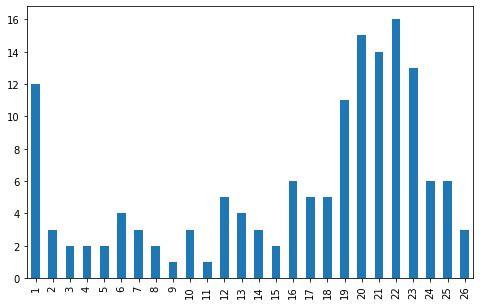

In [158]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 5))
tweet_df["Length"].value_counts().sort_index().plot.bar()

**Task 6**: Use the information in the column 'created_at' and add a column 'hour' to the DataFrame as illustrated below.

In [115]:
tweet_df["Created At"] = pd.to_datetime(tweet_df["Created At"])
hour_list = []

for h in tweet_df["Created At"]:
  hour_list.append(h.hour)

tweet_df["Hour"] = hour_list
tweet_df.head(8)

,Text,Favorite Count,Retweet Count,Created At,Length,Hour
0,https://t.co/iVY45x4l4A https://t.co/hx2nwiVoKy,22069,5375,2020-09-15 04:07:53+00:00,47,4
1,My team and I are closely monitoring extremely...,30345,6925,2020-09-15 03:25:01+00:00,144,3
2,...caused over so many years. Any attack by Ir...,53098,12874,2020-09-15 03:04:34+00:00,140,3
3,"According to press reports, Iran may be planni...",59694,17166,2020-09-15 03:04:33+00:00,140,3
4,RT @SWAtlasHoover: 1/4: I was asked by the Pre...,0,6120,2020-09-15 02:52:47+00:00,140,2
5,RT @SteveDaines: An absolute honor to be endor...,0,9182,2020-09-15 02:49:30+00:00,140,2
6,RT @SenateGOP: Stronger trade deals. Killing t...,0,4457,2020-09-15 02:45:50+00:00,140,2
7,Left California for Arizona. Leaving Arizona a...,50408,11860,2020-09-15 02:31:10+00:00,140,2


**Task 7**: Use a bar plot and plot the frequencies of the times at which tweets were sent (at hourly intervals).

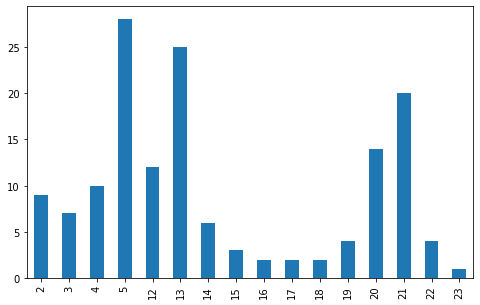

In [159]:
plt.figure(figsize = (8, 5))
tweet_df["Hour  "].value_counts().sort_index().plot.bar()

**Task 8**: Use a regular expression that finds the hashtags in the tweets ('text'), add them to a new column 'hashtag' and display the resulting DataFrame. 

In [164]:
import re

hash_list = []
for tweet in text_list:
  hash_list.append(re.findall(r'#(\w+)', tweet))

tweet_df["Hashtags"] = hash_list
tweet_df

,Text,Favorite Count,Retweet Count,Created At,Length,Hour,Hashtags
0,https://t.co/iVY45x4l4A https://t.co/hx2nwiVoKy,22069,5375,2020-09-15 04:07:53+00:00,2,4,[]
1,My team and I are closely monitoring extremely...,30345,6925,2020-09-15 03:25:01+00:00,21,3,[]
2,...caused over so many years. Any attack by Ir...,53098,12874,2020-09-15 03:04:34+00:00,23,3,[]
3,"According to press reports, Iran may be planni...",59694,17166,2020-09-15 03:04:33+00:00,20,3,[]
4,RT @SWAtlasHoover: 1/4: I was asked by the Pre...,0,6120,2020-09-15 02:52:47+00:00,22,2,[]
...,...,...,...,...,...,...,...
144,I am running for re-election to bring prosperi...,134992,34266,2020-09-13 04:49:55+00:00,21,4,[]
145,I did more in 47 months as President than Slee...,78111,19893,2020-09-13 04:35:50+00:00,18,4,[MAGA]
146,...The far-left maniacs supporting Joe Biden a...,71560,16954,2020-09-13 04:20:30+00:00,19,4,[]
147,"Joe Biden cannot LEAD our Country, because he ...",111068,28318,2020-09-13 04:20:29+00:00,20,4,[]


**Task 9**: Use a regular expression that removes all links from the tweets ('text'), add a column 'text_without_links' and display the resulting DataFrame.

In [169]:
raw_text_list = []

for tweet in text_list:
  raw_text_list.append(re.sub(r'https?:\/\/.*[\r\n]*', '', tweet, flags = re.MULTILINE))

tweet_df["without URL"] = raw_text_list
tweet_df

,Text,Favorite Count,Retweet Count,Created At,Length,Hour,Hashtags,without URL
0,https://t.co/iVY45x4l4A https://t.co/hx2nwiVoKy,22069,5375,2020-09-15 04:07:53+00:00,2,4,[],
1,My team and I are closely monitoring extremely...,30345,6925,2020-09-15 03:25:01+00:00,21,3,[],My team and I are closely monitoring extremely...
2,...caused over so many years. Any attack by Ir...,53098,12874,2020-09-15 03:04:34+00:00,23,3,[],...caused over so many years. Any attack by Ir...
3,"According to press reports, Iran may be planni...",59694,17166,2020-09-15 03:04:33+00:00,20,3,[],"According to press reports, Iran may be planni..."
4,RT @SWAtlasHoover: 1/4: I was asked by the Pre...,0,6120,2020-09-15 02:52:47+00:00,22,2,[],RT @SWAtlasHoover: 1/4: I was asked by the Pre...
...,...,...,...,...,...,...,...,...
144,I am running for re-election to bring prosperi...,134992,34266,2020-09-13 04:49:55+00:00,21,4,[],I am running for re-election to bring prosperi...
145,I did more in 47 months as President than Slee...,78111,19893,2020-09-13 04:35:50+00:00,18,4,[MAGA],I did more in 47 months as President than Slee...
146,...The far-left maniacs supporting Joe Biden a...,71560,16954,2020-09-13 04:20:30+00:00,19,4,[],...The far-left maniacs supporting Joe Biden a...
147,"Joe Biden cannot LEAD our Country, because he ...",111068,28318,2020-09-13 04:20:29+00:00,20,4,[],"Joe Biden cannot LEAD our Country, because he ..."


**Task 10**: Remove all retweets ('RT') from the DataFrame and display the resulting DataFrame.

In [172]:
og_tweet_df = tweet_df[~tweet_df.Text.str.contains("RT")]
og_tweet_df

,Text,Favorite Count,Retweet Count,Created At,Length,Hour,Hashtags,without URL
0,https://t.co/iVY45x4l4A https://t.co/hx2nwiVoKy,22069,5375,2020-09-15 04:07:53+00:00,2,4,[],
1,My team and I are closely monitoring extremely...,30345,6925,2020-09-15 03:25:01+00:00,21,3,[],My team and I are closely monitoring extremely...
2,...caused over so many years. Any attack by Ir...,53098,12874,2020-09-15 03:04:34+00:00,23,3,[],...caused over so many years. Any attack by Ir...
3,"According to press reports, Iran may be planni...",59694,17166,2020-09-15 03:04:33+00:00,20,3,[],"According to press reports, Iran may be planni..."
7,Left California for Arizona. Leaving Arizona a...,50408,11860,2020-09-15 02:31:10+00:00,18,2,[],Left California for Arizona. Leaving Arizona a...
...,...,...,...,...,...,...,...,...
144,I am running for re-election to bring prosperi...,134992,34266,2020-09-13 04:49:55+00:00,21,4,[],I am running for re-election to bring prosperi...
145,I did more in 47 months as President than Slee...,78111,19893,2020-09-13 04:35:50+00:00,18,4,[MAGA],I did more in 47 months as President than Slee...
146,...The far-left maniacs supporting Joe Biden a...,71560,16954,2020-09-13 04:20:30+00:00,19,4,[],...The far-left maniacs supporting Joe Biden a...
147,"Joe Biden cannot LEAD our Country, because he ...",111068,28318,2020-09-13 04:20:29+00:00,20,4,[],"Joe Biden cannot LEAD our Country, because he ..."
